In [0]:
import tensorflow as tf
import numpy
from math import *
import pandas as pd

In [0]:
def covariance(data,dim1,dim2):#finds the covariance between any two dimentions
  total=0
  for i in data:
    total+=i[dim1]*i[dim2]
  return total/(len(data)-1)#using Bessel's correction here

In [7]:
#test data from https://www.kaggle.com/aungpyaeap/fish-market
#import data
dataFrame=pd.read_csv("Fish.csv")
dataFrame=dataFrame.drop(columns=["Species"])
dataFrame

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [0]:
axies=6
data=[]
for inx,v in dataFrame.iterrows():
  data.append([float(i) for i in v])

In [0]:
#centre the data & calculate variances
totals=[0 for i in range(axies)]
squareTotals=[0 for i in range(axies)]
means=[0 for i in range(axies)]
variances=[0 for i in range(axies)]
for i in data:
  for j,v in enumerate(i):
    totals[j]+=v
    squareTotals[j]+=v**2
for i in range(axies):
  means[i]=totals[i]/len(data)
  variances[i]=squareTotals[i]/len(data)#calculate variance for each dimention
for x,i in enumerate(data):
  for y,j in enumerate(i):
    data[x][y]=j-means[y]
print(data)
print(variances)

In [12]:
#Build the covariance matrix
#The fun begins
covarianceRows=[]
for i in range(axies):
  covarianceRows.append([])
  for j in range(axies):
    if(i!=j):
      print(format(covariance(data,i,j),".2f"),end="\t")
      covarianceRows[i].append(covariance(data,i,j))
    else:
      print(format(variances[i],".2f"),end="\t")
      covarianceRows[i].append(variances[i])
  print()
  print()

covarianceMatrix=tf.constant(covarianceRows)

286006.44	3276.88	3524.01	3836.37	1111.41	534.99	

3276.88	788.21	107.07	115.14	26.80	14.61	

3524.01	107.07	921.57	123.69	29.42	15.78	

3836.37	115.14	123.69	1109.08	35.00	17.19	

1111.41	26.80	29.42	35.00	98.73	5.73	

534.99	14.61	15.78	17.19	5.73	22.34	



In [0]:
#The magic eigenvalues
#multi-dimentional lines of best fit
PCEigVals,protoPCs=tf.eig(covarianceMatrix)
print(tf.eig(covarianceMatrix))
PCEigVals=[float(i)for i in PCEigVals]
protoPCs=[[float(j)for j in i] for i in protoPCs]
print(PCEigVals)
print(protoPCs)

In [0]:
#sort eigen stuff
PCs = [x for _,x in sorted(zip(PCEigVals,protoPCs),reverse=True)]
PCEigVals=sorted(PCEigVals,reverse=True)
print(PCEigVals)
print(PCs)
PCmatrix=[]
for i in range(axies):
  PCmatrix.append([])
  for j in range(axies):
    PCmatrix[i].append(PCs[j][i])
print(PCmatrix)

Scree Plot
PC-1	variance:57228.9375	%-variance:99.03037523524827%
PC-2	variance:221.8309326171875	%-variance:0.38386175692786806%
PC-3	variance:172.01248779296876	%-variance:0.2976546823237153%
PC-4	variance:143.57205810546876	%-variance:0.2484406562236358%
PC-5	variance:18.734788513183595	%-variance:0.03241914348686957%
PC-6	variance:4.188870620727539	%-variance:0.007248525789641919%


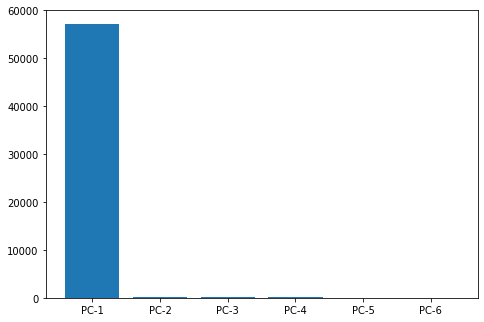

In [15]:
#Scree plot
print("Scree Plot")
from matplotlib import pyplot as plt
toPlot=[]
for i,v in enumerate(PCEigVals):
  var=v/(axies-1)
  if(var<0):
    break#because they are ordered descending
  toPlot.append(var)
total=sum(toPlot)
for i,v in enumerate(toPlot):
  print("PC-"+str(i+1)+"\tvariance:"+str(v)+"\t%-variance:"+str(v/total*100)+"%")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["PC-"+str(i+1) for i in range(len(toPlot))]
ax.bar(langs,toPlot)
plt.show()

In [16]:
newVals=tf.matmul(tf.constant(data),tf.constant(PCmatrix))
[print("PC-"+str(i+1)+"\t",end="") for i in range(len(toPlot))]
print()
for i in newVals:
  for j in i:
    print(format(j,".2f"),end="\t")
  print()

PC-1	PC-2	PC-3	PC-4	PC-5	PC-6	
156.32	-3.78	0.88	1.62	-3.39	-0.67	
108.34	-2.44	2.53	1.06	-2.15	-0.33	
58.40	-0.14	2.75	1.47	-1.50	0.13	
35.32	-1.53	4.00	-1.08	0.58	-0.07	
-31.62	1.21	4.48	-1.04	1.01	0.71	
-51.60	1.82	5.88	-1.28	1.96	0.51	
-101.53	4.04	6.70	-0.46	2.62	0.92	
8.29	-1.65	4.70	-2.48	1.39	0.21	
-51.63	1.03	6.39	-1.56	2.26	0.43	
-101.61	2.33	7.37	-2.23	3.17	0.62	
-76.63	1.33	7.18	-2.53	3.23	0.72	
-101.62	2.14	7.46	-2.27	3.49	0.47	
-101.64	1.72	6.94	-2.83	3.75	0.03	
58.17	-5.71	6.21	-5.07	2.57	0.52	
-201.54	5.85	9.06	-2.39	5.26	0.96	
-201.53	5.86	9.50	-2.20	5.38	1.35	
-301.47	9.24	10.10	-2.84	6.83	1.22	
-301.48	9.24	10.26	-2.99	6.80	1.13	
-211.58	4.81	10.19	-3.74	6.59	0.93	
-251.56	6.43	9.51	-3.91	6.66	1.60	
-176.65	2.85	9.81	-5.16	6.40	1.33	
-286.52	7.61	11.29	-3.64	7.70	1.26	
-221.60	4.64	10.53	-4.97	7.33	1.10	
-281.55	6.98	11.27	-5.41	8.13	2.04	
-301.53	7.77	12.07	-4.88	8.52	1.51	
-326.49	8.97	12.54	-4.96	8.69	2.01	
-321.51	8.56	12.38	-4.74	8.72	2.03	
-315.54	7.60	12.74	-5

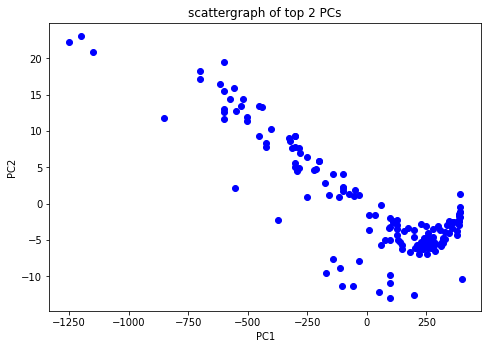

In [17]:
#plot pc1 vs pc2
xAxis=[]
yAxis=[]
for i in newVals:
  xAxis.append(float(i[0]))
  yAxis.append(float(i[1]))

boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(xAxis, yAxis, color='b')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('scattergraph of top 2 PCs')
plt.show()